Project 2

Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
What can you infer about each of the distinct groups?

In [36]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite


from tqdm import tqdm #Instantly make your loops show a smart progress meter 
import random 
from scipy import stats
import csv

# Import bi-partite (bi-modal) functions
from networkx.algorithms import bipartite as bi

from pyvis.network import Network # interactive graph

group_members = "https://raw.githubusercontent.com/letisalba/Data-620/master/Week-3/group_members.csv"
df_grp_mem = pd.read_csv(group_members)
print(df_grp_mem)

       id  username  group_id  tenant_id
0    1810    smalla        38          1
1    1807    bikram        38          1
2    1809  gmspcmov        38          1
3    1811  monlucha        38          1
4    1816  krskucyk        38          1
..    ...       ...       ...        ...
995  1725    lzqrw8        15          1
996  1728    lzvpnx        15          1
997  1703    baruab        15          1
998  1675    BZ3JGX        15          1
999  1733    lzfk46        15          1

[1000 rows x 4 columns]


In [37]:
sub_df = df_grp_mem[['username', 'group_id']]

sub_df

,username,group_id
0,smalla,38
1,bikram,38
2,gmspcmov,38
3,monlucha,38
4,krskucyk,38
...,...,...
995,lzqrw8,15
996,lzvpnx,15
997,baruab,15
998,BZ3JGX,15


In [38]:
sub_df.username.nunique()

374

In [39]:
sub_df.username.value_counts()

michael     30
mary        22
mklucens    20
alexey      19
john        15
            ..
qzjftj50     1
fz2gns       1
wzrpzh       1
vzqpcr50     1
abc          1
Name: username, Length: 374, dtype: int64

In [40]:
# defining the list of nodes from the columns
userlist = list(sub_df['username'])
groups = list(sub_df['group_id'])

set_username = set(userlist)
set_group = set(groups)

print("unique number of username = ", len(set_username))
print("unique number of groups = ", len(set_group))

unique number of username =  374
unique number of groups =  21


# Graph creation

In [58]:
# top and bottom references the list of username (top) and groups (bottom)
def create_from_edgelist(top,bottom): 
    
    # creating graph
    B = nx.Graph()
    
    # iterating through each row since each one is an edge 
    for i in range(len(top)):
        B.add_node(top[i], bipartite=0)
        B.add_node(bottom[i], bipartite=1)
        B.add_edge(top[i], bottom[i])
    return B

# assign the list 
B = create_from_edgelist(userlist, groups)

print("The number of nodes = ", len(B.nodes))
print("The number of edges = ", len(B.edges))

edg_data = B.edges
print(edg_data['weight'])

The number of nodes =  395
The number of edges =  940


ValueError: too many values to unpack (expected 2)

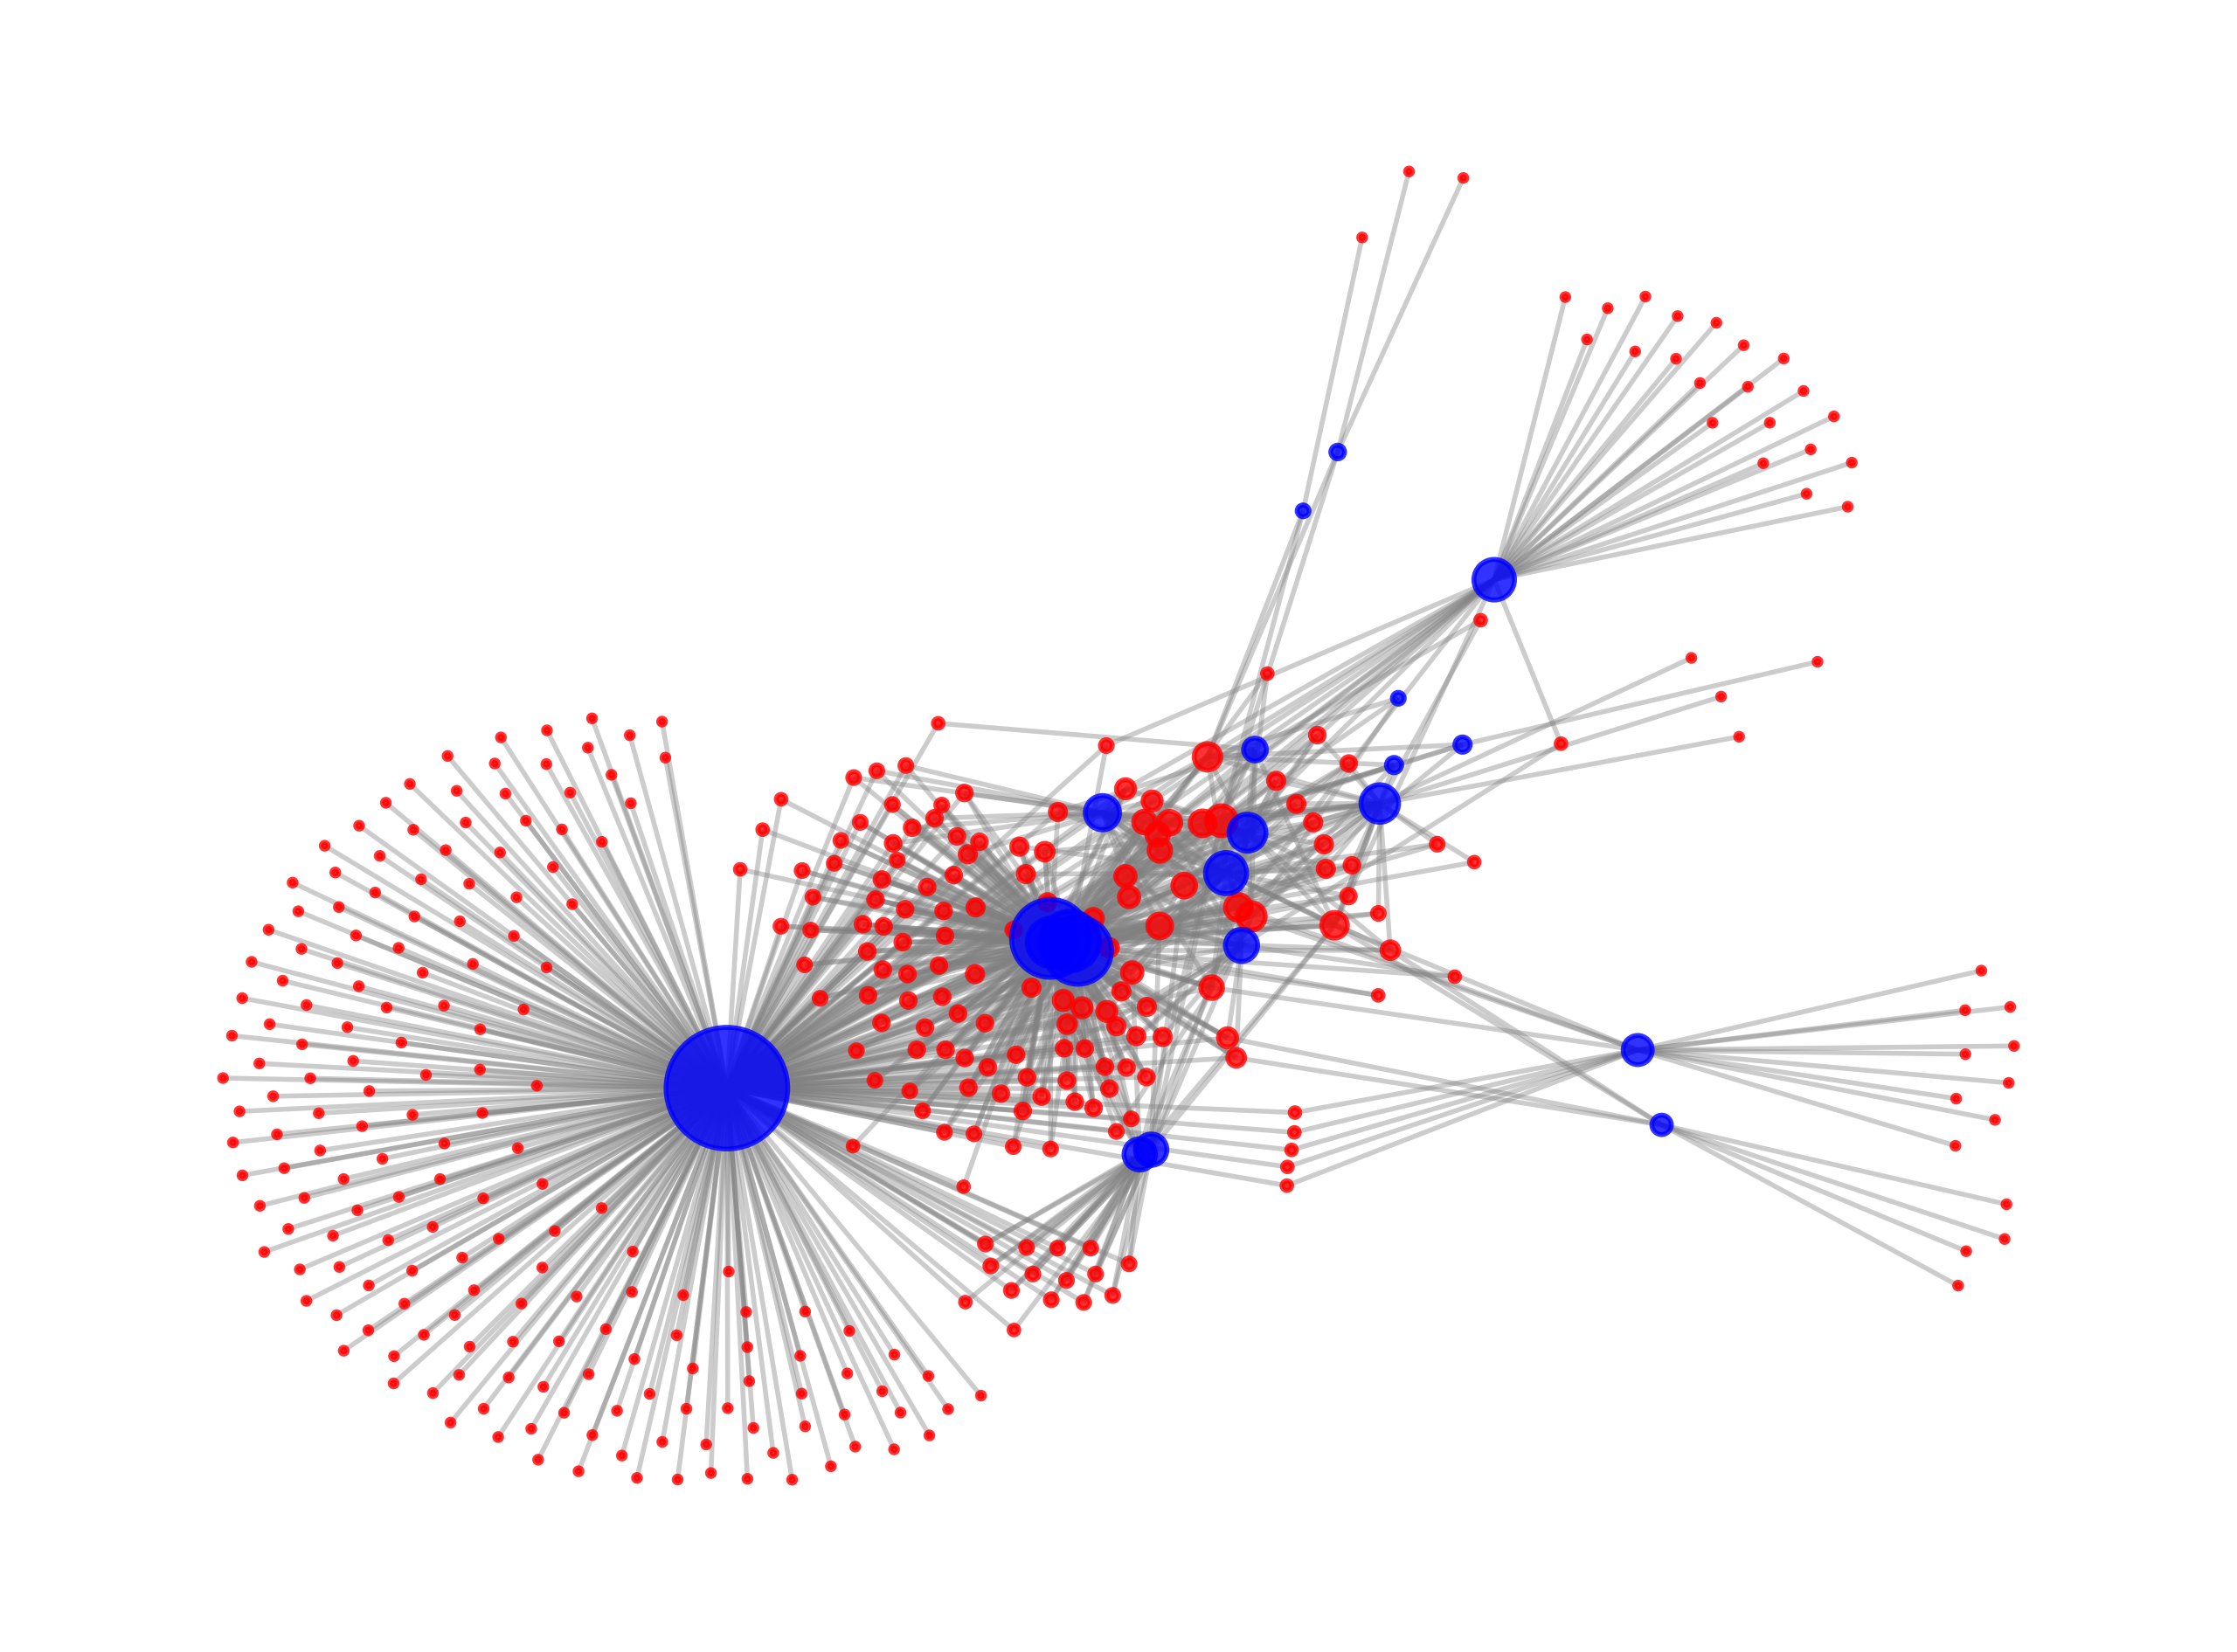

In [42]:
# Creating environment for figure
f = plt.figure(1,figsize=(8,6), dpi=400)

# defining layout
pos = nx.spring_layout(B)

colors = {0:'r', 1:'b'}

# defining nodes
nx.draw_networkx_nodes(B, pos=pos, \
                      node_size=[B.degree[node]*2 for node in B], \
                      alpha=0.8, \
                      node_color=[colors[B.nodes[node]['bipartite']] for node in B])

# definging the edges
nx.draw_networkx_edges(B, pos=pos, alpha=0.4, \
                      edge_color = 'gray')

plt.axis('off')
plt.show()


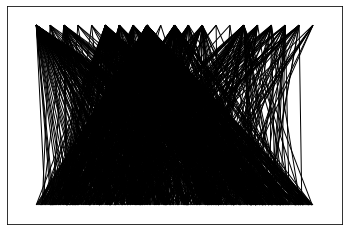

In [43]:
# definging the edges
nx.draw_networkx_edges(B, pos= nx.bipartite_layout(B, userlist, align='horizontal'))

In [44]:
Gs = bipartite.projected_graph(B, userlist)
Gm = bipartite.projected_graph(B, userlist, 'MultiGraph')
Gw = bipartite.weighted_projected_graph(B, userlist)


In [45]:
print(Gs.degree())


[('smalla', 335), ('bikram', 192), ('gmspcmov', 7), ('monlucha', 334), ('krskucyk', 7), ('bridnash', 7), ('mcawley', 140), ('nboerner', 7), ('SGXCBC', 17), ('jluludis', 339), ('FZ8XG0', 323), ('LNHNUA', 17), ('JMHXGX', 17), ('RZD1MZ', 323), ('MNQSCB', 17), ('HZQMB2', 323), ('mklucens', 345), ('VZRR2Y', 323), ('CZPLBC', 17), ('CBWYRZ', 17), ('CWKPSZ', 17), ('john', 365), ('XZZN0R', 323), ('YXNPNG', 17), ('EXCHND', 17), ('DZSVRD', 314), ('DZ2MX6', 314), ('shonkaj', 330), ('Iyatshyn', 330), ('KZSF63', 314), ('KZ70ZD', 314), ('alexey', 360), ('acommins', 330), ('testuser', 314), ('FZJMZF', 314), ('cz4p81', 314), ('rzg5bj', 314), ('mzl8yg', 314), ('nzzzlz', 314), ('zzqqc5', 314), ('QZPPGQ', 314), ('YZC9YM', 314), ('jchristina', 330), ('kbalboa', 330), ('XZ354Z', 335), ('wz0sgf', 314), ('szmv26', 314), ('thedsase', 356), ('CZTFXR', 331), ('mariella', 335), ('gmccuser', 103), ('JZQWLY', 328), ('JZV5T4', 331), ('GZPLFT', 331), ('RZ3LK1', 330), ('WZFR5D', 330), ('xztp6r', 51), ('chcasto', 330),

In [46]:
print(Gm.degree())


[('smalla', 687), ('bikram', 479), ('gmspcmov', 7), ('monlucha', 592), ('krskucyk', 7), ('bridnash', 7), ('mcawley', 322), ('nboerner', 7), ('SGXCBC', 17), ('jluludis', 783), ('FZ8XG0', 330), ('LNHNUA', 17), ('JMHXGX', 17), ('RZD1MZ', 330), ('MNQSCB', 17), ('HZQMB2', 330), ('mklucens', 853), ('VZRR2Y', 330), ('CZPLBC', 17), ('CBWYRZ', 17), ('CWKPSZ', 17), ('john', 877), ('XZZN0R', 330), ('YXNPNG', 17), ('EXCHND', 17), ('DZSVRD', 353), ('DZ2MX6', 353), ('shonkaj', 714), ('Iyatshyn', 665), ('KZSF63', 353), ('KZ70ZD', 353), ('alexey', 895), ('acommins', 714), ('testuser', 353), ('FZJMZF', 353), ('cz4p81', 353), ('rzg5bj', 353), ('mzl8yg', 353), ('nzzzlz', 353), ('zzqqc5', 353), ('QZPPGQ', 353), ('YZC9YM', 353), ('jchristina', 714), ('kbalboa', 742), ('XZ354Z', 826), ('wz0sgf', 333), ('szmv26', 333), ('thedsase', 829), ('CZTFXR', 631), ('mariella', 652), ('gmccuser', 116), ('JZQWLY', 462), ('JZV5T4', 631), ('GZPLFT', 631), ('RZ3LK1', 536), ('WZFR5D', 536), ('xztp6r', 55), ('chcasto', 585),

In [47]:
print(Gw.degree())


[('smalla', 335), ('bikram', 192), ('gmspcmov', 7), ('monlucha', 334), ('krskucyk', 7), ('bridnash', 7), ('mcawley', 140), ('nboerner', 7), ('SGXCBC', 17), ('jluludis', 339), ('FZ8XG0', 323), ('LNHNUA', 17), ('JMHXGX', 17), ('RZD1MZ', 323), ('MNQSCB', 17), ('HZQMB2', 323), ('mklucens', 345), ('VZRR2Y', 323), ('CZPLBC', 17), ('CBWYRZ', 17), ('CWKPSZ', 17), ('john', 365), ('XZZN0R', 323), ('YXNPNG', 17), ('EXCHND', 17), ('DZSVRD', 314), ('DZ2MX6', 314), ('shonkaj', 330), ('Iyatshyn', 330), ('KZSF63', 314), ('KZ70ZD', 314), ('alexey', 360), ('acommins', 330), ('testuser', 314), ('FZJMZF', 314), ('cz4p81', 314), ('rzg5bj', 314), ('mzl8yg', 314), ('nzzzlz', 314), ('zzqqc5', 314), ('QZPPGQ', 314), ('YZC9YM', 314), ('jchristina', 330), ('kbalboa', 330), ('XZ354Z', 335), ('wz0sgf', 314), ('szmv26', 314), ('thedsase', 356), ('CZTFXR', 331), ('mariella', 335), ('gmccuser', 103), ('JZQWLY', 328), ('JZV5T4', 331), ('GZPLFT', 331), ('RZ3LK1', 330), ('WZFR5D', 330), ('xztp6r', 51), ('chcasto', 330),

In [48]:
print(Gw.degree(weight='weight'))

[('smalla', 687), ('bikram', 479), ('gmspcmov', 7), ('monlucha', 592), ('krskucyk', 7), ('bridnash', 7), ('mcawley', 322), ('nboerner', 7), ('SGXCBC', 17), ('jluludis', 783), ('FZ8XG0', 330), ('LNHNUA', 17), ('JMHXGX', 17), ('RZD1MZ', 330), ('MNQSCB', 17), ('HZQMB2', 330), ('mklucens', 853), ('VZRR2Y', 330), ('CZPLBC', 17), ('CBWYRZ', 17), ('CWKPSZ', 17), ('john', 877), ('XZZN0R', 330), ('YXNPNG', 17), ('EXCHND', 17), ('DZSVRD', 353), ('DZ2MX6', 353), ('shonkaj', 714), ('Iyatshyn', 665), ('KZSF63', 353), ('KZ70ZD', 353), ('alexey', 895), ('acommins', 714), ('testuser', 353), ('FZJMZF', 353), ('cz4p81', 353), ('rzg5bj', 353), ('mzl8yg', 353), ('nzzzlz', 353), ('zzqqc5', 353), ('QZPPGQ', 353), ('YZC9YM', 353), ('jchristina', 714), ('kbalboa', 742), ('XZ354Z', 826), ('wz0sgf', 333), ('szmv26', 333), ('thedsase', 829), ('CZTFXR', 631), ('mariella', 652), ('gmccuser', 116), ('JZQWLY', 462), ('JZV5T4', 631), ('GZPLFT', 631), ('RZ3LK1', 536), ('WZFR5D', 536), ('xztp6r', 55), ('chcasto', 585),

In [49]:
# create vis network
net = Network(notebook=True)
# load the networkx graph
net.from_nx(B)
# show
net.show("graph1.html")

graph1.html


In [51]:
# Borrowed from SNAS Chapter 4
def trim_edges(g, weight=1):
        g2=nx.Graph()
        for f, to, edata in g.edges(data=True):
                if edata['weight'] > weight:
                        g2.add_edge(f,to,edata)
        return g2

In [52]:
# Borrowed from SNAS Chapter 4
def island_method(g, iterations=5):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]

    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)

    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [53]:
A = (B.subgraph(c) for c in nx.connected_components(B))
A = list(A)[0]
print("The number of nodes = ", len(A.nodes))
print("The number of edges = ", len(A.edges))

The number of nodes =  395
The number of edges =  940


In [54]:
##cc=Network.connected_component_subgraphs(e)[0] # this is causing an attribute error


##cc= (G.subgraph(c) for c in connected_components(G))
A = (B.subgraph(c) for c in nx.connected_components(B))
A = list(A)[0]

islands=island_method(A)
for i in islands:
# print the threshold level, size of the graph, and number of connected components
    print(i[0], len(i[1]), len(net.connected_component_subgraphs(i[1])))

KeyError: 'weight'